In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.xception import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'xception_dealing_with_imbalance_2_oversampling_and_bias'

In [3]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

In [4]:
BATCH_SIZE = 64
unbalanced_dataset = load_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
balanced_train_dataset = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [5]:
all_labels = []

for images, labels in balanced_train_dataset.take(100):
    all_labels.append(labels.numpy())

all_labels = np.concatenate(all_labels)
class_counts = np.sum(all_labels, axis=0)

In [6]:
mean_class_count = np.mean(class_counts)
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [7]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 5.0680 - categorical cross entropy: 5.0680 - mean squared error: 0.1014 - accuracy: 0.5889 - auc: 0.5025 - prc: 0.1516

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_1\assets


29/29 [==============================] - 96s 1s/step - loss: 5.0680 - categorical cross entropy: 5.0680 - mean squared error: 0.1014 - accuracy: 0.5889 - auc: 0.5025 - prc: 0.1516 - val_loss: 1.9860 - val_categorical cross entropy: 1.9860 - val_mean squared error: 0.0912 - val_accuracy: 0.6705 - val_auc: 0.5511 - val_prc: 0.1642 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - ETA: 0s - loss: 1.1843 - categorical cross entropy: 1.1843 - mean squared error: 0.0783 - accuracy: 0.6670 - auc: 0.5130 - prc: 0.1475

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_2\assets


29/29 [==============================] - 31s 1s/step - loss: 1.1843 - categorical cross entropy: 1.1843 - mean squared error: 0.0783 - accuracy: 0.6670 - auc: 0.5130 - prc: 0.1475 - val_loss: 1.1557 - val_categorical cross entropy: 1.1557 - val_mean squared error: 0.0763 - val_accuracy: 0.6705 - val_auc: 0.5000 - val_prc: 0.1429 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 1.1428 - categorical cross entropy: 1.1428 - mean squared error: 0.0753 - accuracy: 0.6659 - auc: 0.5240 - prc: 0.1575

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_3\assets


29/29 [==============================] - 29s 1s/step - loss: 1.1428 - categorical cross entropy: 1.1428 - mean squared error: 0.0753 - accuracy: 0.6659 - auc: 0.5240 - prc: 0.1575 - val_loss: 1.1324 - val_categorical cross entropy: 1.1324 - val_mean squared error: 0.0746 - val_accuracy: 0.6705 - val_auc: 0.5066 - val_prc: 0.1471 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 1.1261 - categorical cross entropy: 1.1261 - mean squared error: 0.0740 - accuracy: 0.6654 - auc: 0.5530 - prc: 0.1623

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_4\assets


29/29 [==============================] - 28s 997ms/step - loss: 1.1261 - categorical cross entropy: 1.1261 - mean squared error: 0.0740 - accuracy: 0.6654 - auc: 0.5530 - prc: 0.1623 - val_loss: 1.0506 - val_categorical cross entropy: 1.0506 - val_mean squared error: 0.0700 - val_accuracy: 0.6705 - val_auc: 0.6180 - val_prc: 0.1813 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - ETA: 0s - loss: 1.0837 - categorical cross entropy: 1.0837 - mean squared error: 0.0721 - accuracy: 0.6638 - auc: 0.5981 - prc: 0.1743

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_5\assets


29/29 [==============================] - 29s 1s/step - loss: 1.0837 - categorical cross entropy: 1.0837 - mean squared error: 0.0721 - accuracy: 0.6638 - auc: 0.5981 - prc: 0.1743 - val_loss: 1.0268 - val_categorical cross entropy: 1.0268 - val_mean squared error: 0.0675 - val_accuracy: 0.6705 - val_auc: 0.6822 - val_prc: 0.2024 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - ETA: 0s - loss: 0.9963 - categorical cross entropy: 0.9963 - mean squared error: 0.0658 - accuracy: 0.6807 - auc: 0.6570 - prc: 0.1930

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_6\assets


29/29 [==============================] - 27s 952ms/step - loss: 0.9963 - categorical cross entropy: 0.9963 - mean squared error: 0.0658 - accuracy: 0.6807 - auc: 0.6570 - prc: 0.1930 - val_loss: 0.9907 - val_categorical cross entropy: 0.9907 - val_mean squared error: 0.0652 - val_accuracy: 0.6705 - val_auc: 0.7139 - val_prc: 0.2106 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - ETA: 0s - loss: 0.9768 - categorical cross entropy: 0.9768 - mean squared error: 0.0639 - accuracy: 0.6773 - auc: 0.6909 - prc: 0.1994

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_7\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_7\assets


29/29 [==============================] - 27s 931ms/step - loss: 0.9768 - categorical cross entropy: 0.9768 - mean squared error: 0.0639 - accuracy: 0.6773 - auc: 0.6909 - prc: 0.1994 - val_loss: 0.9635 - val_categorical cross entropy: 0.9635 - val_mean squared error: 0.0636 - val_accuracy: 0.6705 - val_auc: 0.7220 - val_prc: 0.2304 - lr: 0.0010
Epoch 8/100
29/29 [==============================] - 10s 329ms/step - loss: 0.9565 - categorical cross entropy: 0.9565 - mean squared error: 0.0645 - accuracy: 0.6767 - auc: 0.6717 - prc: 0.1962 - val_loss: 0.9809 - val_categorical cross entropy: 0.9809 - val_mean squared error: 0.0647 - val_accuracy: 0.6705 - val_auc: 0.6850 - val_prc: 0.2018 - lr: 0.0010
Epoch 9/100
29/29 [==============================] - 12s 419ms/step - loss: 1.0078 - categorical cross entropy: 1.0078 - mean squared error: 0.0665 - accuracy: 0.6681 - auc: 0.6569 - prc: 0.2011 - val_loss: 1.0419 - val_categorical cross entropy: 1.0419 - val_mean squared error: 0.0688 - val_a

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_10\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_10\assets


29/29 [==============================] - 31s 1s/step - loss: 0.9592 - categorical cross entropy: 0.9592 - mean squared error: 0.0628 - accuracy: 0.6697 - auc: 0.7215 - prc: 0.2172 - val_loss: 0.9380 - val_categorical cross entropy: 0.9380 - val_mean squared error: 0.0620 - val_accuracy: 0.6705 - val_auc: 0.7211 - val_prc: 0.2179 - lr: 0.0010
Epoch 11/100
29/29 [==============================] - 10s 336ms/step - loss: 0.9440 - categorical cross entropy: 0.9440 - mean squared error: 0.0607 - accuracy: 0.6756 - auc: 0.7429 - prc: 0.2268 - val_loss: 0.9862 - val_categorical cross entropy: 0.9862 - val_mean squared error: 0.0646 - val_accuracy: 0.6705 - val_auc: 0.7563 - val_prc: 0.2507 - lr: 0.0010
Epoch 12/100
29/29 [==============================] - ETA: 0s - loss: 0.9459 - categorical cross entropy: 0.9459 - mean squared error: 0.0624 - accuracy: 0.6552 - auc: 0.7522 - prc: 0.2399

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_12\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_12\assets


29/29 [==============================] - 27s 963ms/step - loss: 0.9459 - categorical cross entropy: 0.9459 - mean squared error: 0.0624 - accuracy: 0.6552 - auc: 0.7522 - prc: 0.2399 - val_loss: 0.9151 - val_categorical cross entropy: 0.9151 - val_mean squared error: 0.0586 - val_accuracy: 0.6705 - val_auc: 0.7625 - val_prc: 0.2450 - lr: 0.0010
Epoch 13/100
29/29 [==============================] - 10s 330ms/step - loss: 0.8430 - categorical cross entropy: 0.8430 - mean squared error: 0.0555 - accuracy: 0.6972 - auc: 0.7906 - prc: 0.2513 - val_loss: 0.9160 - val_categorical cross entropy: 0.9160 - val_mean squared error: 0.0574 - val_accuracy: 0.7060 - val_auc: 0.7681 - val_prc: 0.2506 - lr: 0.0010
Epoch 14/100
29/29 [==============================] - ETA: 0s - loss: 0.8507 - categorical cross entropy: 0.8507 - mean squared error: 0.0559 - accuracy: 0.7064 - auc: 0.8042 - prc: 0.2477

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_14\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_14\assets


29/29 [==============================] - 27s 953ms/step - loss: 0.8507 - categorical cross entropy: 0.8507 - mean squared error: 0.0559 - accuracy: 0.7064 - auc: 0.8042 - prc: 0.2477 - val_loss: 0.9065 - val_categorical cross entropy: 0.9065 - val_mean squared error: 0.0592 - val_accuracy: 0.7070 - val_auc: 0.7850 - val_prc: 0.2612 - lr: 0.0010
Epoch 15/100
29/29 [==============================] - ETA: 0s - loss: 0.8568 - categorical cross entropy: 0.8568 - mean squared error: 0.0563 - accuracy: 0.7020 - auc: 0.7914 - prc: 0.2527

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_15\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_15\assets


29/29 [==============================] - 27s 928ms/step - loss: 0.8568 - categorical cross entropy: 0.8568 - mean squared error: 0.0563 - accuracy: 0.7020 - auc: 0.7914 - prc: 0.2527 - val_loss: 0.8180 - val_categorical cross entropy: 0.8180 - val_mean squared error: 0.0544 - val_accuracy: 0.7135 - val_auc: 0.8174 - val_prc: 0.2642 - lr: 0.0010
Epoch 16/100
29/29 [==============================] - 10s 330ms/step - loss: 0.8169 - categorical cross entropy: 0.8169 - mean squared error: 0.0541 - accuracy: 0.7069 - auc: 0.8115 - prc: 0.2609 - val_loss: 0.8274 - val_categorical cross entropy: 0.8274 - val_mean squared error: 0.0547 - val_accuracy: 0.7115 - val_auc: 0.8076 - val_prc: 0.2655 - lr: 0.0010
Epoch 17/100
29/29 [==============================] - 10s 330ms/step - loss: 0.8371 - categorical cross entropy: 0.8371 - mean squared error: 0.0559 - accuracy: 0.7004 - auc: 0.8096 - prc: 0.2582 - val_loss: 0.8638 - val_categorical cross entropy: 0.8638 - val_mean squared error: 0.0569 - val

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_18\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_18\assets


29/29 [==============================] - 31s 1s/step - loss: 0.8341 - categorical cross entropy: 0.8341 - mean squared error: 0.0559 - accuracy: 0.6972 - auc: 0.8088 - prc: 0.2769 - val_loss: 0.7965 - val_categorical cross entropy: 0.7965 - val_mean squared error: 0.0533 - val_accuracy: 0.7090 - val_auc: 0.8356 - val_prc: 0.2778 - lr: 0.0010
Epoch 19/100
29/29 [==============================] - ETA: 0s - loss: 0.8490 - categorical cross entropy: 0.8490 - mean squared error: 0.0571 - accuracy: 0.6859 - auc: 0.8349 - prc: 0.2811

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_19\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_19\assets


29/29 [==============================] - 29s 999ms/step - loss: 0.8490 - categorical cross entropy: 0.8490 - mean squared error: 0.0571 - accuracy: 0.6859 - auc: 0.8349 - prc: 0.2811 - val_loss: 0.7896 - val_categorical cross entropy: 0.7896 - val_mean squared error: 0.0541 - val_accuracy: 0.7095 - val_auc: 0.8572 - val_prc: 0.3063 - lr: 0.0010
Epoch 20/100
29/29 [==============================] - 10s 330ms/step - loss: 0.8124 - categorical cross entropy: 0.8124 - mean squared error: 0.0551 - accuracy: 0.6880 - auc: 0.8286 - prc: 0.2942 - val_loss: 0.8762 - val_categorical cross entropy: 0.8762 - val_mean squared error: 0.0571 - val_accuracy: 0.6930 - val_auc: 0.8415 - val_prc: 0.3112 - lr: 0.0010
Epoch 21/100
29/29 [==============================] - ETA: 0s - loss: 0.7888 - categorical cross entropy: 0.7888 - mean squared error: 0.0533 - accuracy: 0.7100 - auc: 0.8392 - prc: 0.3042

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_21\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_21\assets


29/29 [==============================] - 32s 1s/step - loss: 0.7888 - categorical cross entropy: 0.7888 - mean squared error: 0.0533 - accuracy: 0.7100 - auc: 0.8392 - prc: 0.3042 - val_loss: 0.7761 - val_categorical cross entropy: 0.7761 - val_mean squared error: 0.0514 - val_accuracy: 0.7180 - val_auc: 0.8543 - val_prc: 0.3221 - lr: 0.0010
Epoch 22/100
29/29 [==============================] - 10s 334ms/step - loss: 0.8044 - categorical cross entropy: 0.8044 - mean squared error: 0.0544 - accuracy: 0.6967 - auc: 0.8502 - prc: 0.3057 - val_loss: 0.9386 - val_categorical cross entropy: 0.9386 - val_mean squared error: 0.0545 - val_accuracy: 0.7105 - val_auc: 0.8310 - val_prc: 0.3171 - lr: 0.0010
Epoch 23/100
29/29 [==============================] - 10s 333ms/step - loss: 0.7774 - categorical cross entropy: 0.7774 - mean squared error: 0.0524 - accuracy: 0.7010 - auc: 0.8588 - prc: 0.3094 - val_loss: 0.8602 - val_categorical cross entropy: 0.8602 - val_mean squared error: 0.0526 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_26\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_26\assets


29/29 [==============================] - 29s 1s/step - loss: 0.6985 - categorical cross entropy: 0.6985 - mean squared error: 0.0464 - accuracy: 0.7554 - auc: 0.8883 - prc: 0.3448 - val_loss: 0.7298 - val_categorical cross entropy: 0.7298 - val_mean squared error: 0.0501 - val_accuracy: 0.7290 - val_auc: 0.8806 - val_prc: 0.3513 - lr: 0.0010
Epoch 27/100
29/29 [==============================] - 10s 331ms/step - loss: 0.7062 - categorical cross entropy: 0.7062 - mean squared error: 0.0480 - accuracy: 0.7565 - auc: 0.8754 - prc: 0.3558 - val_loss: 0.7623 - val_categorical cross entropy: 0.7623 - val_mean squared error: 0.0513 - val_accuracy: 0.7275 - val_auc: 0.8725 - val_prc: 0.3380 - lr: 0.0010
Epoch 28/100
29/29 [==============================] - 10s 331ms/step - loss: 0.7500 - categorical cross entropy: 0.7500 - mean squared error: 0.0509 - accuracy: 0.7274 - auc: 0.8719 - prc: 0.3382 - val_loss: 0.8147 - val_categorical cross entropy: 0.8147 - val_mean squared error: 0.0525 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_34\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_34\assets


29/29 [==============================] - 38s 1s/step - loss: 0.6603 - categorical cross entropy: 0.6603 - mean squared error: 0.0456 - accuracy: 0.7721 - auc: 0.9077 - prc: 0.4015 - val_loss: 0.7186 - val_categorical cross entropy: 0.7186 - val_mean squared error: 0.0496 - val_accuracy: 0.7400 - val_auc: 0.8951 - val_prc: 0.3980 - lr: 0.0010
Epoch 35/100
29/29 [==============================] - ETA: 0s - loss: 0.6553 - categorical cross entropy: 0.6553 - mean squared error: 0.0456 - accuracy: 0.7608 - auc: 0.9062 - prc: 0.4050

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_35\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_35\assets


29/29 [==============================] - 29s 1s/step - loss: 0.6553 - categorical cross entropy: 0.6553 - mean squared error: 0.0456 - accuracy: 0.7608 - auc: 0.9062 - prc: 0.4050 - val_loss: 0.6860 - val_categorical cross entropy: 0.6860 - val_mean squared error: 0.0463 - val_accuracy: 0.7600 - val_auc: 0.8969 - val_prc: 0.4443 - lr: 0.0010
Epoch 36/100
29/29 [==============================] - 10s 332ms/step - loss: 0.6260 - categorical cross entropy: 0.6260 - mean squared error: 0.0439 - accuracy: 0.7748 - auc: 0.9137 - prc: 0.4249 - val_loss: 0.8143 - val_categorical cross entropy: 0.8143 - val_mean squared error: 0.0562 - val_accuracy: 0.6925 - val_auc: 0.8901 - val_prc: 0.3904 - lr: 0.0010
Epoch 37/100
29/29 [==============================] - 10s 331ms/step - loss: 0.6490 - categorical cross entropy: 0.6490 - mean squared error: 0.0452 - accuracy: 0.7624 - auc: 0.9193 - prc: 0.4627 - val_loss: 0.7430 - val_categorical cross entropy: 0.7430 - val_mean squared error: 0.0498 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_40\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_and_bias_10_40\assets


29/29 [==============================] - 30s 1s/step - loss: 0.6550 - categorical cross entropy: 0.6550 - mean squared error: 0.0456 - accuracy: 0.7654 - auc: 0.9175 - prc: 0.4347 - val_loss: 0.6583 - val_categorical cross entropy: 0.6583 - val_mean squared error: 0.0456 - val_accuracy: 0.7690 - val_auc: 0.9237 - val_prc: 0.4675 - lr: 0.0010
Epoch 41/100
29/29 [==============================] - 10s 331ms/step - loss: 0.5822 - categorical cross entropy: 0.5822 - mean squared error: 0.0412 - accuracy: 0.7915 - auc: 0.9331 - prc: 0.4779 - val_loss: 0.7574 - val_categorical cross entropy: 0.7574 - val_mean squared error: 0.0513 - val_accuracy: 0.7380 - val_auc: 0.8916 - val_prc: 0.4290 - lr: 0.0010
Epoch 42/100
29/29 [==============================] - 10s 332ms/step - loss: 0.6215 - categorical cross entropy: 0.6215 - mean squared error: 0.0429 - accuracy: 0.7812 - auc: 0.9204 - prc: 0.4877 - val_loss: 0.8388 - val_categorical cross entropy: 0.8388 - val_mean squared error: 0.0577 - val_ac

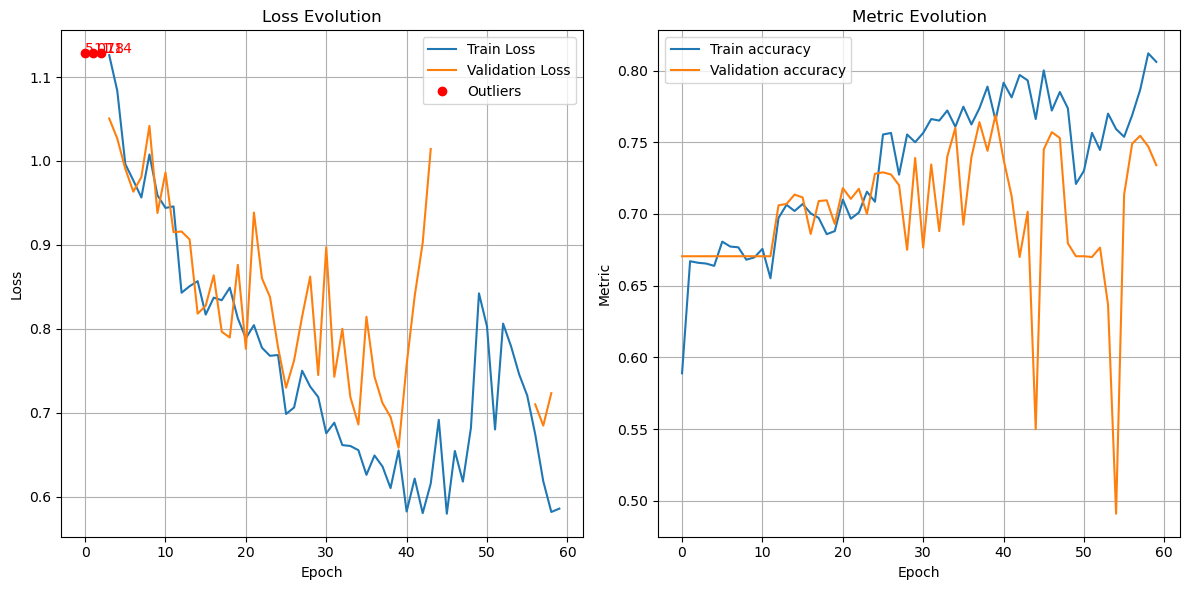

(<keras.engine.functional.Functional at 0x1ae5a28dc10>,
 <keras.callbacks.History at 0x1ae5eb92ca0>)

In [8]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
    lambda: get_basic_model(
        HEIGHT,
        WIDTH,
        num_classes,
        metrics=METRICS,
        biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20)